In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from random import uniform
import matplotlib.pyplot as plt
from pyDOE import lhs
%matplotlib inline

In [2]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        hidden_channle = 20
        self.net = nn.Sequential(
            nn.Linear(1, hidden_channle), nn.Tanh(),
            nn.Linear(hidden_channle, hidden_channle), nn.Tanh(),
            nn.Linear(hidden_channle, hidden_channle), nn.Tanh(),
            nn.Linear(hidden_channle, hidden_channle), nn.Tanh(),
            nn.Linear(hidden_channle, hidden_channle), nn.Tanh(),
            nn.Linear(hidden_channle, 1)
        )
    def forward(self,x):
        x=self.net(x)
        return x

In [3]:
def u_function(y):
    u = model(y)
    return u

def f_function(y, p_x):
    u = u_function(y)
    u_y = torch.autograd.grad(u, y, torch.ones_like(u), retain_graph=True, create_graph=True)[0]
    u_yy = torch.autograd.grad(u_y, y, torch.ones_like(u_y), retain_graph=True, create_graph=True)[0]
    
    f = mu * u_yy - p_x
    return f
    
def Loss(u, y_u, y_f, p_x):
    u_pre = u_function(y_u)
    f_pre = f_function(y_f, p_x)
    # loss
    null =  torch.zeros((y_f.shape[0], 1))
    u_loss = loss_fn(u_pre, u)
    f_loss = loss_fn(f_pre, null)
    
    ls = u_loss + f_loss
    ls.backward()
    return ls

def Exact_u(y):
    u = - p_x * y * (h - y) / 2 / mu
    return u

In [4]:
U = 1
h = 1
mu = 1
N_u = 2
N_f = 10000
Y_f_train = np.random.rand(N_f,1) * h

y_u = torch.tensor(np.array([0,h]).reshape(-1, 1), dtype=torch.float32, requires_grad=True)
y_f = torch.tensor(Y_f_train.reshape(-1, 1), dtype=torch.float32, requires_grad=True)

u = torch.tensor(np.array([0,0]).reshape(-1, 1), dtype=torch.float32, requires_grad=True)

loss_fn = nn.MSELoss()
# 模型训练
def train(epochs, p_x, model):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=200, gamma=0.5) # 动态递减学习率
    Losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = Loss(u, y_u, y_f, p_x)
        Losses.append(loss.item())
        if epoch % 100 ==0:
            print(f"[Epoch {epoch+1}/{epochs}] [loss: {loss.item()}]")
        optimizer.step()
        scheduler.step()
    plt.plot(Losses)
    plt.show()

[Epoch 1/500] [loss: 0.0005676312139257789]
[Epoch 101/500] [loss: 6.240918448696675e-09]
[Epoch 201/500] [loss: 3.5618876736975835e-09]
[Epoch 301/500] [loss: 3.1443794235030964e-09]
[Epoch 401/500] [loss: 2.715501601358028e-09]


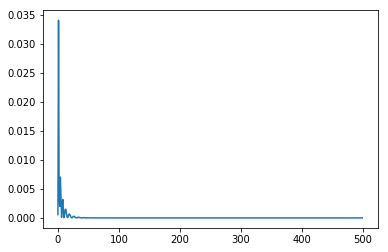

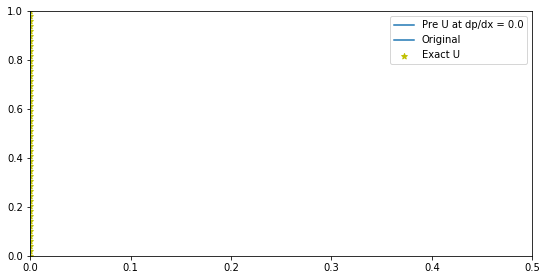

[Epoch 1/500] [loss: 0.9465858936309814]
[Epoch 101/500] [loss: 8.517704554833472e-05]
[Epoch 201/500] [loss: 6.008117998135276e-05]
[Epoch 301/500] [loss: 5.162315210327506e-05]
[Epoch 401/500] [loss: 4.459836782189086e-05]


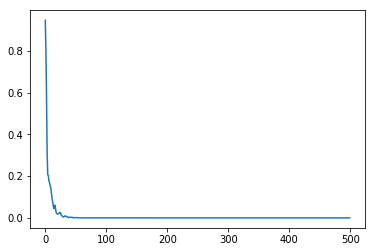

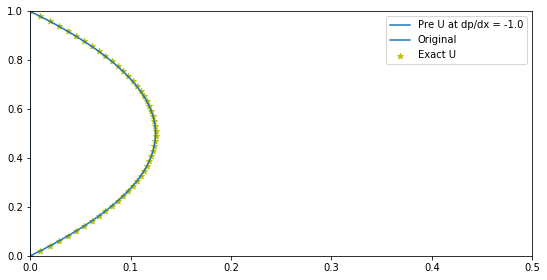

[Epoch 1/500] [loss: 3.9155664443969727]
[Epoch 101/500] [loss: 0.0008045088034123182]
[Epoch 201/500] [loss: 0.000627648551017046]
[Epoch 301/500] [loss: 0.0005534383817575872]
[Epoch 401/500] [loss: 0.00048256569425575435]


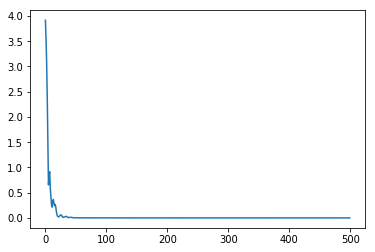

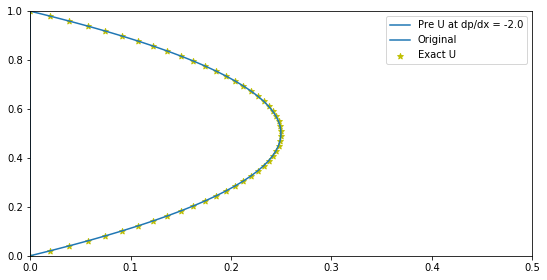

[Epoch 1/500] [loss: 8.942920684814453]
[Epoch 101/500] [loss: 0.0017036719946190715]
[Epoch 201/500] [loss: 0.0010197164956480265]
[Epoch 301/500] [loss: 0.0008628647774457932]
[Epoch 401/500] [loss: 0.0007557281060144305]


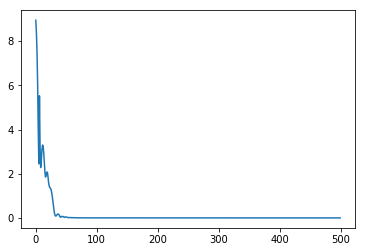

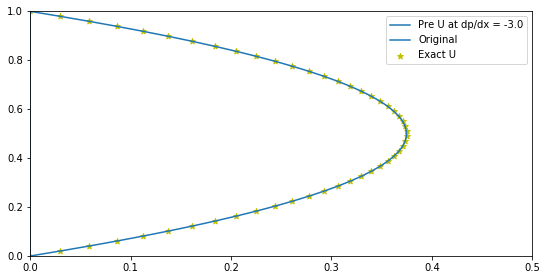

In [5]:
P_x = torch.linspace(0,-3,4, dtype=torch.float32, requires_grad=True).reshape(-1, 1)
for i in range(len(P_x)):
    model = MLP()
    model.train()
    p_x = P_x[i]
    train(500, p_x, model)
    model.eval()
    with torch.no_grad():
        ycol = torch.linspace(0,h,50).reshape(-1,1)
        u_pre = u_function(ycol)
    U_pre = u_pre.detach().numpy()
    U_ex = Exact_u(ycol).detach().numpy()
    fig = plt.figure(figsize=(9, 4.5))
    ax = fig.add_subplot(111)
    ax.plot(U_pre,ycol,label='Pre U at dp/dx = '+ str(P_x[i].item()))
    ax.scatter(U_ex,ycol,marker='*',color='y',label='Exact U')
    plt.axvline(x=0,label='Original')
    plt.ylim(0, h)
    plt.xlim(0, 0.5)
    plt.legend()
    plt.show()